# Environment

In [1]:
import scanpy as sc
from harmony import harmonize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import anndata as ad

# Read-in data

In [2]:
# Read-in data
adata = ...

# Batch-aware feature selection

In [6]:
adata.X = adata.layers['logcounts'].copy()
sc.pp.highly_variable_genes(
    adata, n_top_genes=4000, batch_key=batch_key
)

adata_hvg = adata[:, adata.var["highly_variable"]].copy()

In [8]:
adata_harmony = adata_hvg.copy()
adata_harmony.X = adata_harmony.layers["logcounts"].copy()
sc.pp.pca(adata_harmony)

In [9]:
adata_harmony.obsm["Harmony"] = harmonize(adata_harmony.obsm["X_pca"], adata_harmony.obs, batch_key=batch_key, max_iter_harmony=100)

sc.pp.neighbors(adata_harmony, use_rep='Harmony')
sc.tl.umap(adata_harmony)

	Initialization is completed.
	Completed 1 / 100 iteration(s).
	Completed 2 / 100 iteration(s).
	Completed 3 / 100 iteration(s).
	Completed 4 / 100 iteration(s).
	Completed 5 / 100 iteration(s).
Reach convergence after 5 iteration(s).


2024-10-22 22:35:46.332366: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 22:35:46.726400: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 22:35:46.900877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-22 22:35:47.838309: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 22:36:03.759783: W tensorflow/comp

# Apply the integration

In [10]:
obs_key = "Harmony"

sc.pp.neighbors(adata_harmony, use_rep=obs_key)
sc.tl.umap(adata_harmony)

adata.uns['umap'] = adata_harmony.uns['umap']
adata.uns['neighbors'] = adata_harmony.uns['neighbors']
adata.uns['pca'] = adata_harmony.uns['pca']
adata.uns['umap'] = adata_harmony.uns['umap']
adata.obsm = {'X_umap': adata_harmony.obsm['X_umap'], 
              'X_pca': adata_harmony.obsm['X_pca'],
              obs_key: adata_harmony.obsm[obs_key]}

adata.obsp = {'distances': adata_harmony.obsp['distances'], 
              'connectivities': adata_harmony.obsp['connectivities']}

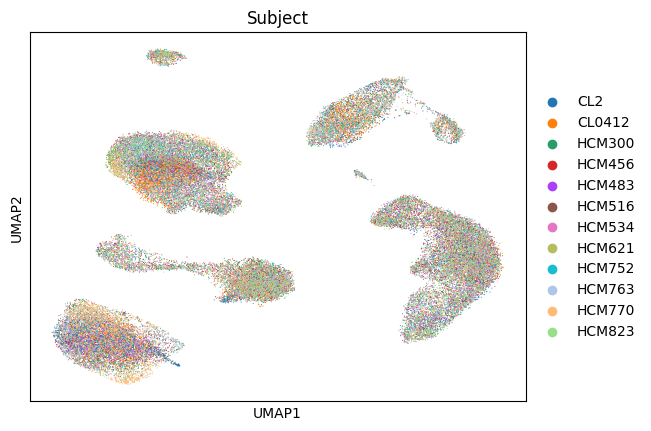

In [12]:
sc.pl.umap(adata, color=[batch_key])